# What is Information?

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Entropy_flip_2_coins.jpg" alt="Information" style="width:50%">

In [1]:
%matplotlib inline

from ipywidgets import widgets
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci
import seaborn as sns

**Which of these two statements conveys the most information?**

- I will eat some food tomorrow.
- I will see a giraffe walking by my apartment. 

**A measure of information (whatever it may be) is closely related to the element of... surprise!**

- has very high probability and so conveys little information,
- has very low probability and so conveys much information. 

> If we quanitfy suprise we will quantify information

**Playing cards**

Which is more surprising (contains more information)?

- E1: The card is heart?

- E2:The card is Queen?

- E3: The card is Queen of hearts?

- $P(E_1) = \frac{1}{4}$


- $P(E_2)  =  \frac{4}{52} = \frac{1}{13}$


- $P(E_1 and E_2) = \frac{1}{52}$ 

**Gaining information**

1. We learn the card is heart $I(E_1)$


2. We learn the card is Queen $I(E_2)$


3. $I(E_1 and E_2) = I(E_1) + I(E_2)$

> 4. Knowledge of event can add to information but neer take away from it: $I(E) \geq 0$

### A candidate function for information!

$$I(E) = - C' log_D p(E)$$

$$I(E) = - C log_2 p(E) $$

> Constant $C', D$ can be combined into one $$log_a y = \frac{log_b y}{log_b a}$$ if we agree on log base

### Why bit (base two)

Consider symmetric Bernouli process, e.g 1D random walk with equal jump probabilities:

$$I(X=0) = I(X=1) = -log_2 \frac{1}{2} = 1$$

$$(x_0,x_1,...x_N) = 10111101001010100100$$

> **Random walk = string of Yes/No questions**

<ipython-input-2-6c77b4bcd0d2>:2: RuntimeWarning: divide by zero encountered in log
  return -p*np.log(p) - (1-p)*np.log(1-p)
<ipython-input-2-6c77b4bcd0d2>:2: RuntimeWarning: invalid value encountered in multiply
  return -p*np.log(p) - (1-p)*np.log(1-p)


Text(0.5, 0, 'p')

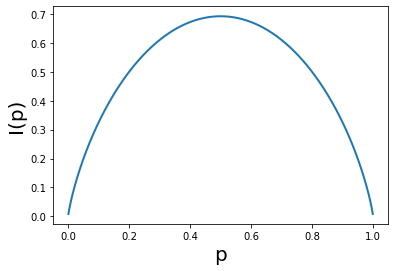

In [2]:
def I_bern(p):
    return -p*np.log(p) - (1-p)*np.log(1-p)

p = np.linspace(0,1,1000)
plt.plot(p, I_bern(p), lw=2)

plt.ylabel('I(p)',fontsize =20)

plt.xlabel('p',fontsize =20)

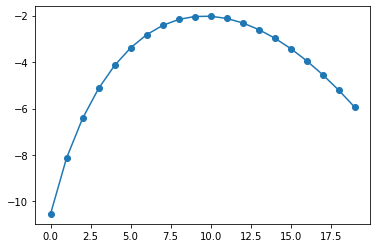

In [3]:
from scipy.stats import binom

N = 100 #trials
p = 0.01 # probability of sucess

W_bin = [binom.pmf(k,N, p=0.1) for k in range(20)] 

plt.plot(np.arange(20),np.log(W_bin), '-o')

In [4]:
from scipy.stats import entropy

die = 1/6 * np.ones(6)
print(entropy(die, base=2))

die[5], die[4] = 0, 1/3
print(entropy(die, base=2))

die[4], die[3] = 0, 2/3
print(entropy(die, base=2))

2.584962500721156
2.2516291673878226
1.6644977792004614


### How many yes or no on average to reconstruct random walk?

**Answer**
<br>
$$H(X) = \langle -log p(X) \rangle$$

**Shannon  Measure of Information (SMI)**
$$H = -\sum_i p_i log p_i$$

**Surprise**

$$I_i = -log p_i$$

> Information is an average of surprise.!!! How surprised are you on average? 

### Back to the roots of Infromation theory: decoding (secret) messages

Information per letter $I(m)$ to decode the message

- $m:$ Letters in the alphabet (Russian: 33,Enlgish: 26,  Korean: 24) 


- $I(Russian) > I(English) > I(Korean)$


- $I(m_1, m_2) = I(m_1) + I(m_2)$ reagrdless of the order letters are sent!


> One bit is an amount of information one can obtain from the answer to a single yes–no question. The number of bits to decode a message grows witht the lengt of an alphabet and length of the word. 

### Alphabets are not random! hghjxcjxcc

Some letters happen more often than the others! Probability of each letter in an independent sequence is $p_m = \frac{1}{m}$

$$\boxed{H(p) = - \sum_m p_m log_m p_m}$$

> We must send a message explaining how to combine the transferred symbols as a part of the message, but the length of the needed message is finite and independent of the length of the actual message we wish to send, so in the long message limit we may ignore this overhead.

### Shanon Measure of Information

$$\boxed{H = -\sum_i p_i log p_i}$$

> **[To Shanon], You should call it Entropy, for two reasons. 
In the first place you uncertainty function has been used in statistical mechanics under that name. 
In the second place, and more importantly, no one knows what entropy really is, so in a debate you will always have the advantage.” J von Neumann**

### Information per Letter of English

> If the symbols of English alphabet (+ blank) appear equally probably, what is the information carried by a single symbol? This must be $log_2(26 + 1) = 4.755$ bits, but for actual English sentences, it is known to be about **$1.3$ bits. Why?**

### Game of message decoding:

Given some 70 letters decode a 250 letter paragraph!

$$\frac{70}{250}log_2 27 = 1.3$$

> Cover T. M. and King, R. C. (1978). "A convergent gambling estimate of the entropy of English" IEEE Trans. Info. Theory, 24, 413–421

### Quantifying the knowledge ( through Shannon measure of information)

- How much knowledge we need to find out outcome of fair dice?

- We are told die shows a digit higher than 2 (3, 4,5 or6). How much knowledge does this information carry? 

 - $H(E_1) = log_2 6$
 
 
 - $H(E_1) - H(E_2) = log_2 6 - log_2 4$

### Two kittens

There are two kittens. We are told that at least one of them is a male. What is the information we get from this message?

$$E_1 = \{mm,mf,fm, ff \} $$

$$E_2 = \{mm,mf,fm\}$$

$$H(E_1) -H(E_2) = log_2 4 -log_2 3 = 0.41$$

### Monty Hall problem

There are five boxes, of which one contains a prize. A game participant is asked to choose one box. After they choose one of the five boxes, the “coordinator” of the game identifies as empty three of the four unchosen boxes. What is the information of this message? 

- $H(E_1) = log_2 5 = 2.322$


- $H(E_2) = -\frac{1}{5} log_2 5 - \frac{4}{5} log_2 \frac{4}{5} = 0.722$

- $H(E_1)-H(E_2) = 1.6$

### Non integer number of YES/NO questions??

We have encountered a fraction of bit of information several times now. What does it imply in terms of number of YES/NO questions. That is becasue in some cases single YES/NO question can rule out more than one elementary event.

> 999 blue balls and 1 red ball. how many questions we need to ask to determin the colors of all balls? $S = 9.97$ bit or 0.01 bit per ball. Divide the container by 500 and 500 and ask where the red ball is? 1 questions rules out 500 balls at once. 

## What is Entropy?

- **Clausius (1865)** $$\boxed{dS = \frac{\delta Q}{T}}$$

> Entropy foliates thermodynamic space into isentropic surfaces called adiabats. One can only go from one adiabat to another by exchanging heat. 

- **Boltzman (1872)** $$\boxed{S = k_B log \Omega}$$

> Entropy quantifies number of microstates consistent with a macrostate.

- **Gibbs (1878)**  $$\boxed{S = -k_B \sum_i p_i log p_i}$$

> Entropy is related to the probability  $p_i$ by which microstates are weighted in an ensemble. 

- **Shannon (1942)** $$\boxed{H = -\sum_i p_i log p_i}$$

> Entropy quantifies how much of knowledge (information) we need to specify a microstate of a system.

## Back to statistical mechanics and thermodynamics

$$S = -k_B \sum_i p_i log p_i$$
 
- Adiabatic expasion (doubling of volume) of an ideal gas: 

$$\Delta S = N_A k_B log 2 = R log 2$$


> How many YES/NO questions do we need to ask to pinpoint single microsate among the ensemble of microstates of a macrostate.

### Thermodynamic unit of information 

$$k_B log_e W \rightarrow C log_2 W $$

**C = 1 bit/molecule = 9.57 × 10^{-24} J/(K·molecule))**

> Small number becasue in thermodynamics we do not think microscopically and there are huge numbers of molecules. 

### Is information physical?

**Wheeler's It from bit.**

> Every it — every particle, every field of force, even the space-time continuum itself — derives its function, its meaning, its very existence entirely — even if in some contexts indirectly — from the apparatus-elicited answers to yes-or-no questions, binary choices, bits. It from bit symbolizes the idea that every item of the physical world has at bottom — a very deep bottom, in most instances — an immaterial source and explanation; that which we call reality arises in the last analysis from the posing of yes-no questions and the registering of equipment-evoked responses; in short, that **all things physical are information-theoretic in origin**" John Weeler

### Jayne's MaxEnt (Maximum Entropy principle)

Probability is an expression of incomplete information. Given that we have some
information, how should we construct a probability distribution that reflects that
knowledge, but is otherwise unbiased? The best general procedure, known as Jaynes
Maximum Entropy Principle , is to choose the probabilities $p_k$ to maximize the Shanon Measure of Information of the distribution, subject to constraints that express what we do know

- **NVE. Do MaxEnt with no constraints:**

$$- \sum p_i log p_i - \lambda \sum_i p_i$$

$$p_1  = p_2 = ... =  p_N $$

- **NVT. Do MaxEnt with constraint on average energy:**

$$- \sum p_i log p_i - \lambda \sum_i p_i - \beta \sum_i p_i E_i$$

$$p_i \sim e^{-\beta E_i}$$

- **Roll a fair die:**

$$- \sum p_i log p_i - \lambda \sum_i p_i$$

$$p_1  = p_2 = p_3 = p_4= p_5 = p_6$$

- **NVT. Do MaxEnt with biased die which on average gives $\langle x \rangle = 5.5$**

$$- \sum p_i log p_i - \lambda \sum_i p_i - B \sum_i p_i x_i $$

$$p_i \sim e^{-B x_i}$$

### Large deviation Theory and Sanov's theorem

Consider a symmetric random walk again with $p=1/2$ 

$$W_N (n) = \frac{N!}{(N-n)! n!} \Big(\frac{1}{2} \Big)^N$$

$$ log W_N (n) = N \Big[ - \frac{n}{N} log \frac{n}{N} - \frac{N-n}{N} log \frac{N-n}{N} + log2 \Big]$$

$$W_N \sim e^{-N I(n)}$$

**A large deviation function = Entropy (or Free energy)**

$$s(n) = -\sum_i p_i log p_i = - \frac{n}{N} log \frac{n}{N} - \frac{N-n}{N} log \frac{N-n}{N}$$

**Deviation from average $\langle n \rangle =pN$ are expenentially suppressed with number of steps N:**

$$p(n - \langle n \rangle) \sim e^{-N I'(n)}$$

- True distirbution (picutre a histogram) of events $\{q_i \}, i= 1,...$

- Empirical distirbution (picutre a histogram) of events $\{\pi_i \}, i= 1,...$

$$\pi_i \rightarrow q_i \,\,\,\, N \rightarrow +\infty$$

**What is a probability to find some arbitrary $\pi = p$ empirical distirbution?** 

Since we are sampling empirical distirbution from true one:

$$P(\pi = p) = \prod_i  \frac{N!}{(Np_i)!} q_i^{Np_i}$$

$$P(\pi = p) \approx e^{-N \sum p_i log \frac{p_i}{q_i}}$$

**Relative Entropy (Kulback-Leibler measure)**

$$K(p|q) = \sum_i p_i log \frac{p_i}{q_i}$$

> MaxEnt assumes $q_1 =q_2 = ...q_N$ hence a microcanonical assumption is still built into it. 

### Increasing Entropy: surprising or not?

- Entropy of an isolated system increases $S_{high}-S_{low}\geq 0$ for a simple, almost tautological reason that a majority of states of a system are consistent with higher entropy values $S_{high}$. 

$$\Delta S \geq 0$$

$$I \geq 0 $$

- If entropy is interpreted as (the lack of) information then the second law may be stated as: 

- Information never increases by itself, a decrease of (the lack of) information can only be accomplished by an import of information.


> You should never be surprised by or feel the need to explain why any physical system is in a high entropy state. B Greene

## What is Maxwell's demon?

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8b/Maxwell%27s_demon.svg" alt="MaxDemon" style="width:80%">



## Playing Maxwell's demon's advocate

In [5]:
%run ./code/maxwells_demon.py

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

Learn more about making GUIs with python from the following links:
> **[Tkinter](https://docs.python.org/3/library/tkinter.html)**

> **[PySimpleGUI](https://pysimplegui.readthedocs.io/en/latest/)**

<img src="./figs/LandauerExperiment.png" alt="landauer1" style="width:40%"> 

## Information erasure and Landauer's principle

> When a physical system performs a logical operation that erases or loses information, without a copy being preserved, it must transfer a minimum amount of heat, $k_BT log(2)$, to the environment.

> Put another way: if an observer loses information about a physical system, the observer loses the ability to extract work from that system. There is a minimal price to be payed for erasing one bit it is $k_BT log(2)$ (Landauer's bound)

<img src="./figs/LandauerExperiment2.jpg" alt="landauer1" style="width:40%">  

### Szilard's Engine

Recording inforation we can extract work from the environment: $W = k_B log 2$ and $Q = k_B log 2$

- **No ghost principle:** information must be carried by something. Information is physical! 

$$\Delta S = \Delta S + k_B I \geq \frac{Q}{T}$$

$$\Delta S = \Delta S  \geq \frac{Q}{T} - k_B I$$

- Therefore Information can be used to do work. Knowledge is power!

$$\Delta F \geq W + k_B T I $$


### Conditional Entropy 

- System + Aparatus: S, A. After a measurment we have the following ucnertainty about system+apparatus states:

$$H(S,A) = - \sum_{i,j} p(s_i, a_j)log p(s_i a_j)$$

$$H(S) = - \sum_{s_i} p_S(s_i)log p_S(s_i)$$

$$H(S | A) = - \sum_{s_i} p_S(s_i)log p_S(s_i)$$

$$H(S | A) = H(S) - H(S,A) =  -\sum_{s_i} p(s_i, a_j)log \frac{p(s_i, a_j)}{p_A(a_j)}$$

### Mutual Infromation 

$$I(S,A) = H(S) - H(S | A) = H(S) +H(A) - H(S A) = \sum_{s_i} p(s_i, a_j)log \frac{p(s_i, a_j)}{p_S(s_i)p_A(a_j)}\geq 0$$


#### Additional References

1. JMR Parrondo, JM Horowtiz, T Segawa "Thermodynamics of Information" [Nature Physics volume 11, 131 (2015)](https://www.nature.com/articles/nphys3230)
<br>

2. Z Lu, C Jarzynski, "Engineering Maxwell's Demon"[Physics Today 67, (2014)](https://physicstoday.scitation.org/doi/10.1063/PT.3.2490)
<br>

3. O Maroney [Information Processing and Thermodynamic Entropy](https://plato.stanford.edu/entries/information-entropy/)
<br>

4. Observing a quantum Maxwell demon at work []()